In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import json
import os
import requests
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [12]:
# 솔로 랭킹 상위권의 user number를 가져옴

data_path = 'data/'

def getUserJson():
    file_path = data_path+"Ranking_Sol.json"
    print(os.listdir(os.getcwd()))
    userNumArr = []
    with open(file_path,'r',encoding='UTF8') as file:
        json_file = json.load(file)
    for js in json_file["topRanks"]:
        #userNumArr.append((js["userNum"],js["nickname"]))
        userNumArr.append(js["userNum"])

    return userNumArr

arr = getUserJson()

['.git', '.gitignore', 'clus.ipynb', 'clustering.py', 'data', 'docs', 'getUserJson.py', 'parameter.ipynb', 'README.md', 'user.ipynb']


In [ ]:
# api 설정

api_read = open(data_path + 'api.txt', 'r')
api = api_read.readline()

headers = {
    'accept': 'application/json',
    'x-api-key': api,
    'encoding': 'UTF-8',
}


In [10]:
# 선택한 유저의 최근 게임 매칭 데이터를 가져옴

response = requests.get('https://open-api.bser.io/v1/user/games/'+ str(arr[0]), headers=headers)

playerKillArr = []
monsterKillArr = []
gameRankArr = []
characterLevelArr = []
bestWeaponLevelArr = []
damageToMonsterArr = []
damageToPlayerArr = []
damageFromPlayerArr = []
craftLegendArr = []
craftEpicArr = []
mmrGainArr = []
matchingModeArr = []

firstArr = []
secondArr = []

while(True):
    time.sleep(1)
    text = response.text
    info = json.loads(text)
    if 'next' in info:
        next = info['next']
        for js in info['userGames']:
            playerKillArr.append(js['playerKill'])
            monsterKillArr.append(js['monsterKill'])
            gameRankArr.append(js['gameRank'])
            characterLevelArr.append(js['characterLevel'])
            bestWeaponLevelArr.append(js['bestWeaponLevel'])
            damageToMonsterArr.append(js['damageToMonster'])
            damageToPlayerArr.append(js['damageToPlayer'])
            damageFromPlayerArr.append(js['damageFromPlayer'])
            craftLegendArr.append(js['craftLegend'])
            craftEpicArr.append(js['craftEpic'])
            matchingModeArr.append(js['matchingMode'])

        print(next)
    else:
        for js in info['userGames']:
            firstArr.append(js['bestWeaponLevel'])
            secondArr.append(js['gameRank'])
        break

    response = requests.get('https://open-api.bser.io/v1/user/games/'+ str(arr[0])+'?next='+str(next), headers=headers)




NameError: name 'time' is not defined

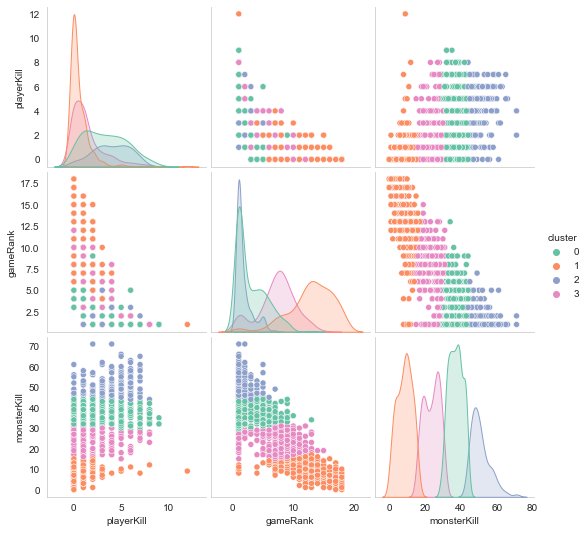

In [87]:
# 클러스터링할 데이터 선택 및 클러스터링 진행

points = pd.DataFrame(playerKillArr).reset_index(drop=True)
points.columns = ['playerKill']
points['gameRank'] = gameRankArr
points['monsterKill'] = monsterKillArr

points.head(n=10)

kmeans = KMeans(n_clusters=4)
kmeans.fit(points)

result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head(n=10)

#sns.jointplot(x="playerKill", y="gameRank", data=result_by_sklearn, kind="kde")
#sns.scatterplot(x='playerKill',y='gameRank',hue='cluster',data=result_by_sklearn,palette='Set2')
sns.pairplot(result_by_sklearn,hue='cluster',palette='Set2')
plt.show()


C:\Users\dolppe\AppData\Local\Temp/ipykernel_10868/3635438339.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=134)


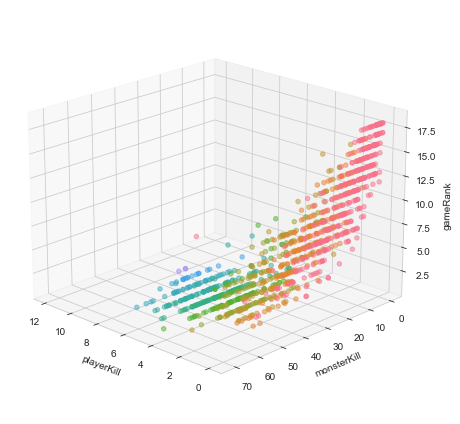

In [90]:
# 클러스터링 결과 3D화

sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=134)
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = result_by_sklearn['playerKill']
y = result_by_sklearn['monsterKill']
z = result_by_sklearn['gameRank']
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
ax.scatter(x, y, z, c=x, marker='o',cmap=cmap,alpha=0.5)
ax.set_xlabel('playerKill')
ax.set_ylabel('monsterKill')
ax.set_zlabel('gameRank')

plt.show()

C:\Users\dolppe\AppData\Local\Temp/ipykernel_10868/515386145.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


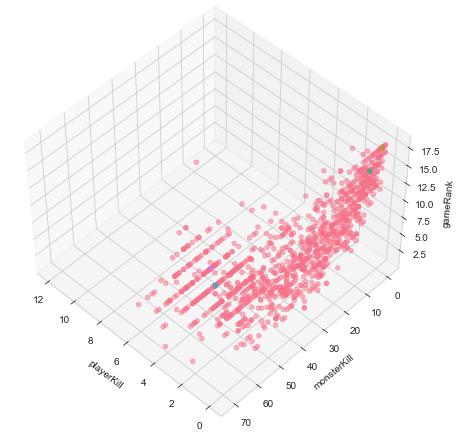

In [18]:
# DBSCAN

model = DBSCAN(min_samples=6)
predict = pd.DataFrame(model.fit_predict(points))
predict.columns=['predict']

r = pd.concat([points,predict],axis=1)

fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['playerKill'],r['monsterKill'],r['gameRank'],c=r['predict'],cmap=cmap,alpha=0.5)
ax.set_xlabel('playerKill')
ax.set_ylabel('monsterKill')
ax.set_zlabel('gameRank')
plt.show()



C:\Users\dolppe\AppData\Local\Temp/ipykernel_10868/2840722248.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


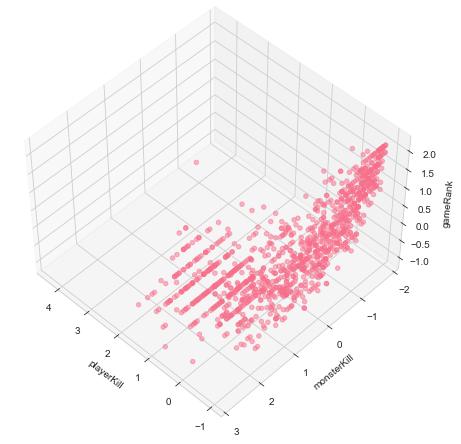

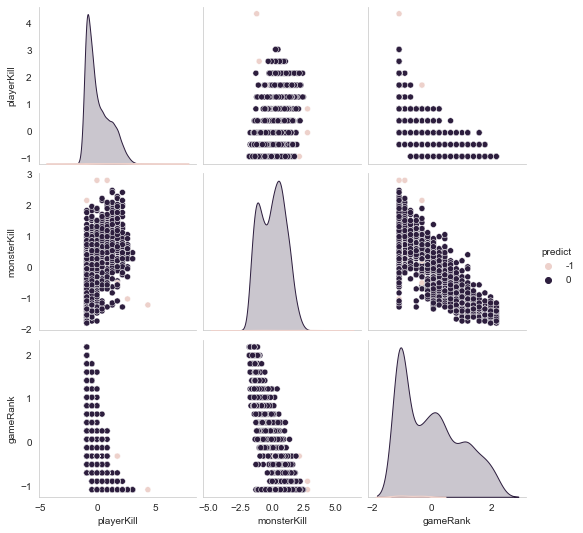

In [78]:
#DBSCAN

#points['bestWeaponLevel'] = bestWeaponLevelArr
#points['characterLevel'] = characterLevelArr

po = points.reindex(columns = ['playerKill','monsterKill','gameRank'])

scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(po), columns = po.columns)
predict_start = df_scale

model = DBSCAN()
#model = DBSCAN(eps=0.5,min_samples=2)
predict = pd.DataFrame(model.fit_predict(predict_start))
predict.columns=['predict']

r = pd.concat([predict_start,predict],axis=1)

fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['playerKill'],r['monsterKill'],r['gameRank'],c=r['predict'],cmap=cmap,alpha=0.5)
ax.set_xlabel('playerKill')
ax.set_ylabel('monsterKill')
ax.set_zlabel('gameRank')
sns.pairplot(r,hue='predict')
plt.show()



C:\Users\dolppe\AppData\Local\Temp/ipykernel_10868/695035165.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) # Method 1


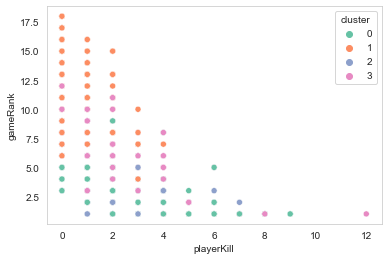

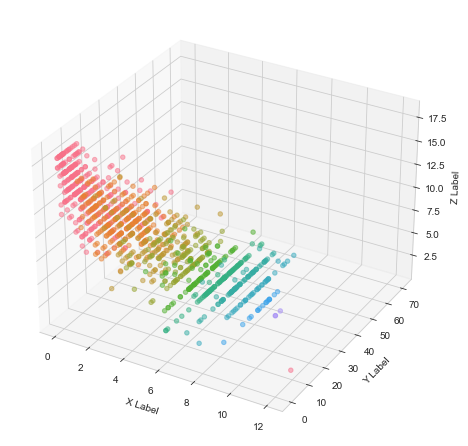

In [83]:
#데이터 분석



kmeans = KMeans(n_clusters=4)
kmeans.fit(points)

result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head(n=10)

#sns.jointplot(x="playerKill", y="gameRank", data=result_by_sklearn, kind="kde")
sns.scatterplot(x='playerKill',y='gameRank',hue='cluster',data=result_by_sklearn,palette='Set2')
#sns.pairplot(result_by_sklearn,hue='cluster',palette='Set2')
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = points['playerKill']
y = points['monsterKill']
z = points['gameRank']
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
ax.scatter(x, y, z, c=x, marker='o',cmap=cmap,alpha=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


C:\Users\dolppe\AppData\Local\Temp/ipykernel_10868/2049835797.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) # Method 1


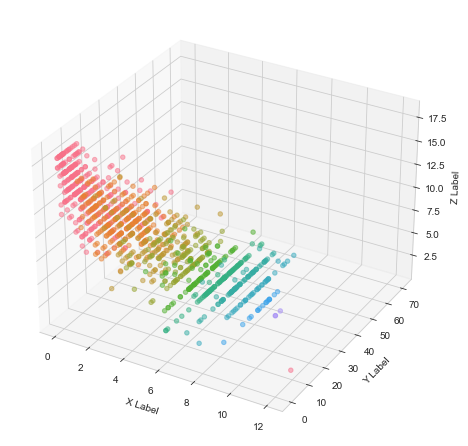

In [80]:
#데이터 분석

sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = points['playerKill']
y = points['monsterKill']
z = points['gameRank']
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
ax.scatter(x, y, z, c=x, marker='o',cmap=cmap,alpha=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()